In [1]:
# import libaries
import numpy as np
import pandas as pd # Version 0.24.2 to use rdkit PandasTools modules
import matplotlib.pyplot as plt
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.7.13.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.24.2
pytest: None
pip: 21.2.4
setuptools: 58.0.4
Cython: None
numpy: 1.21.5
scipy: 1.7.3
pyarrow: None
xarray: None
IPython: 7.31.1
sphinx: None
patsy: None
dateutil: 2.8.2
pytz: 2021.3
blosc: None
bottleneck: 1.3.4
tables: None
numexpr: 2.8.1
feather: None
matplotlib: 3.5.1
openpyxl: 3.0.9
xlrd: None
xlwt: None
xlsxwriter: 3.0.3
lxml.etree: None
bs4: None
html5lib: None
sqlalchemy: None
pymysql: None
psycopg2: None
jinja2: 3.0.3
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


In [2]:
# load data
df_all = pd.read_csv(r'C:\Users\fyang\CCS-Prediction-Publish\Data\alldata.csv')

In [3]:
df_all['SMILES'].isnull().values.any()

False

In [4]:
from rdkit import Chem
from rdkit.Chem import PandasTools

# get fingerprints
def get_FPs(df):
    
    # from SMILES to mol
    PandasTools.AddMoleculeColumnToFrame(df,
                                         'SMILES','Molecules',
                                         includeFingerprints = True)
    df.dropna(subset = ['Molecules'],inplace = True)
    df = df.reset_index()
    # from mol to FPs
    fplist =[Chem.RDKFingerprint(mol, fpSize = 1024) for mol in df.Molecules]
    
    return df, fplist

In [5]:
df_all, fplist= get_FPs(df_all)

In [6]:
df_all['FPs'] = fplist

In [7]:
FPs_name = [f'Bit_{i}' for i in range(1024)]
FPs = [list(fp) for fp in fplist]
df_FPs = pd.DataFrame(FPs, columns=FPs_name)
df_FPs

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_1014,Bit_1015,Bit_1016,Bit_1017,Bit_1018,Bit_1019,Bit_1020,Bit_1021,Bit_1022,Bit_1023
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8,1,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [9]:
df_allsave = pd.concat([df_all, df_FPs], axis = 1,join_axes=[df_all.index] ,sort=False)

In [11]:
df_allsave.to_csv('alldata_withFPs.csv', index = False)
df_all.to_csv('alldata.csv', index = False)

In [8]:
# select data for classifier modeling
df_class = df_all.dropna(subset = ['Super.Class'])

# clean up data
df_class.drop_duplicates(subset = ['CID'], inplace = True)

# check defined super class
df_class['Super.Class'].value_counts()

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Lipids and lipid-like molecules            178
Organic acids and derivatives              160
Benzenoids                                 118
Organoheterocyclic compounds                91
Organic oxygen compounds                    75
Nucleosides, nucleotides, and analogues     74
Phenylpropanoids and polyketides            35
Sugars                                      33
PFAS                                        29
Plasticizer metabolites                     27
Lipids                                      27
PCBs                                        26
Organic nitrogen compounds                  22
Organophosphorus flame retardant (OP)       21
OP metabolites                              14
Bisphenols                                  12
Other chemicals                             10
Plasticizers                                 9
Bile Acids                                   9
Amino Acids                                  8
OH-PBDEs                                     8
Organohalogen

In [11]:
# Calculate pair-wise similarity scores by RDKITSimilarity
from rdkit import DataStructs

def FPs_rdkitSimilarity(df):
    FPs = df['FPs'].tolist()
    scores = []
    keys = range(0,len(FPs))
    for i in range(0, len(FPs)):
        if (i ==0):
            print('Processing compound ', end = '')
        if (i%100 == 0):
            print(i, end = ' ')
        for j in range(i+1, len(FPs)):
            score = DataStructs.FingerprintSimilarity(FPs[i], FPs[j])
            scores.append(score)
    return scores

In [12]:
FPs_rdkitSimilarity = FPs_rdkitSimilarity(df_class)

Processing compound 0 100 200 300 400 500 600 700 800 900 1000 

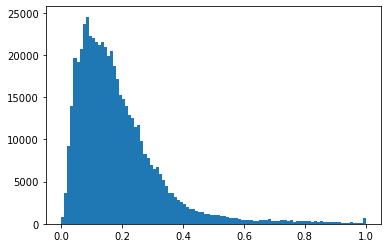

In [13]:
mybins = [ x * 0.01 for x in range(101)]
plt.hist(FPs_rdkitSimilarity, bins=mybins)
plt.show()

In [14]:
import scipy.stats as stats
from scipy.stats import gamma
a_rdkitS = np.array(FPs_rdkitSimilarity)

In [15]:
def gamma_dist(scores):
    # Covert scores to array
    data = np.array(scores)
    # Creat linspace dataset
    xmin = min(data)
    xmax = max(data)
    lnspc = np.linspace(xmin,xmax,len(data))
    # Fit gamma distribution
    a,loc,scale = stats.gamma.fit(data)
    pdf_gamma = stats.gamma.pdf(lnspc,a,loc,scale)
    return a,lnspc,scale,pdf_gamma

In [16]:
ag_rdkit, lnspc_rdkitS, scale, gamma_dist_rdkitS = gamma_dist(FPs_rdkitSimilarity)

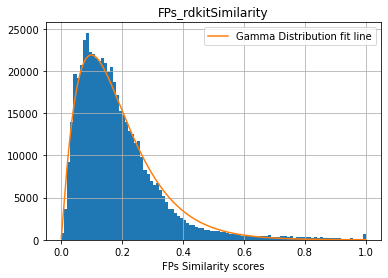

In [17]:
# RDKit similarity
mybins = [ x * 0.01 for x in range(101)]
plt.title('FPs_rdkitSimilarity')
plt.hist(FPs_rdkitSimilarity,bins=mybins)
plt.plot(lnspc_rdkitS, 5500*gamma_dist_rdkitS, label = 'Gamma Distribution fit line')
plt.grid()
plt.xlabel('FPs Similarity scores')
plt.legend(loc=0)
plt.show()

In [18]:
# split df by super class
gb_class = df_class.groupby('Super.Class')
listOfClass = [gb_class.get_group(x) for x in gb_class.groups]

In [19]:
#find the top5 biggest class
listOfClass.sort(key=(lambda x: x.shape[0]),reverse=True)

In [20]:
# calculate FPs similarity and combine classes

def combine_class(list_Of_df, nb_class, similarity_score):
    for i in range(nb_class): #choose the top 5 biggest class as references
        print(i)
        df_ref = list_Of_df[i] #get df from list
        FPs_ref = df_ref['FPs'] #get ref FPs
        label = df_ref.iloc[0]['Super.Class'] #store class label
        
        for j in range(nb_class,len(list_Of_df)): # classes to be combined
            df = list_Of_df[j]
            FPs = df['FPs']
            for fp_ref in FPs_ref:
                for fp in FPs:
                    score = DataStructs.FingerprintSimilarity(fp_ref, fp)
                    if score >= similarity_score:
                        df.loc[df.FPs == fp, 'Super.Class'] = label # assigne to new class
    return list_Of_df

In [24]:
# sort class to have an even distribution of each class
listOfClass = combine_class(listOfClass,5,0.6)

0
1
2
3
4


In [25]:
df_class = pd.concat(listOfClass)
df_class.reset_index(drop = True, inplace = True)

In [26]:
df_class['Super.Class'].value_counts()

Lipids and lipid-like molecules            221
Organic oxygen compounds                   215
Benzenoids                                 203
Organic acids and derivatives              175
Organoheterocyclic compounds               111
PFAS                                        22
Organophosphorus flame retardant (OP)       21
OP metabolites                              14
Organic nitrogen compounds                  13
Bisphenols                                  12
Phenylpropanoids and polyketides             7
Plasticizer metabolites                      7
Other chemicals                              6
Triazoles                                    5
Thiazoles                                    3
Plasticizers                                 3
Organohalogen compounds                      3
Nucleosides, nucleotides, and analogues      2
Alkaloids                                    1
Alkaloids and derivatives                    1
Amino Acids                                  1
Name: Super.C

In [29]:
# Manually assign new class, load result
df_class = pd.read_csv(r'C:\Users\fyang\CCS-Prediction-paper\Data\classifier_model_data.csv')
df_class = get_FPs(df_class)

C:\Users\fyang\Anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
# PCA 
from sklearn.preprocessing import StandardScaler 

df_classFPs = save_FPs(df_class)
x = df_classFPs # features
y = df_class.loc[:,['Super.Class']].values # target

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
decomp = pca.fit_transform(x)
df_decomp = pd.DataFrame(data = decomp, columns = ['PC_1', 'PC_2'])

In [32]:
labels = (df_class['Super.Class'].value_counts()).index

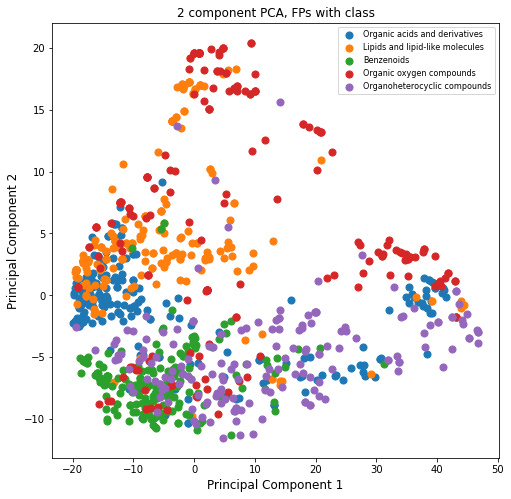

In [36]:
# plot PCA
import matplotlib.pyplot as plt

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd']
fig = plt.figure(figsize= (8,8))
for name, color in zip(labels, colors):
    indices = df_class['Super.Class'] == name
    plt.scatter(df_decomp.loc[indices, 'PC_1'],
               df_decomp.loc[indices,'PC_2'], c = color, s =50)
    plt.legend(labels, prop = {'size':8}, )
plt.title('2 component PCA, FPs with class')
plt.xlabel('Principal Component 1',fontsize = 12)
plt.ylabel('Principal Component 2',fontsize = 12)
plt.show()
fig.savefig('PCA_FPs.png',bbox_inches = 'tight', dpi = 100 )